In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [29]:
# Twitter Api Credentials
consumerKey = "8gkozHxDwmXsvgLvqXMBWcx9T"
consumerSecret = "ycxz3P69xHVYUNY6ViqvYVxAuahB886yLSF4qTxCJ46NnR8tIH"
accessToken = "1331481154189361153-S55qEPfYnPzwLIMFLUonKFt9Z9H3hX"
accessTokenSecret = "i3S0tbdBqBSxtC32UVGZt8VGjFMlFwDUvkeUkEVfiSrfS"

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [68]:
# Extract 200 tweets from the twitter user
posts = api.user_timeline(screen_name="Indonesia", count = 200, lang ="en", tweet_mode="extended")

#  Print the last 10 tweets
print("Show the 10 recent tweets:\n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 10 recent tweets:

1) How a Christian-Muslim Conflict in Eastern Indonesia Birthed the MIT Militant Group https://t.co/lkasOXoBbX

2) 'Embarrassing': Murdoch Uni urged to reconsider ditching Indonesian studies https://t.co/IK5Jt957TH

3) Indonesia's unicorns lure US tech giants from Google to Microsoft https://t.co/0oYxpDErhT

4) 5.1-magnitude quake hits 33 km WNW of Berastagi, Indonesia: USGS https://t.co/M0qUKrQuP0

5) Moderate mag. 5.5 earthquake - 37 km west of Kabanjahe, North Sumatra, Indonesia, on Friday, 4 ... https://t.co/4OliBp7XYV

6) This tropical glacier is rare, revered, and could be gone by next year https://t.co/1iaPm6rxEz

7) Light 4.6 quake hits near Kencong, Indonesia https://t.co/EEiTeRmW3U

8) Indonesia eager to clinch French Rafale fighter jets deal soon: La Tribune https://t.co/gudKeSRuvg

9) Indonesia based man, also known as the 'Con Queen Of Hollywood' arrested https://t.co/tHCeOcZnLO

10) How to Bet on Boxing in Indonesia https://t.co/KRVh9KPIlE



In [46]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 10 rows of data
df.head()

,Tweets
0,How a Christian-Muslim Conflict in Eastern Ind...
1,'Embarrassing': Murdoch Uni urged to reconside...
2,Indonesia's unicorns lure US tech giants from ...
3,5.1-magnitude quake hits 33 km WNW of Berastag...
4,Moderate mag. 5.5 earthquake - 37 km west of K...


In [47]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,How a Christian-Muslim Conflict in Eastern Ind...
1,'Embarrassing': Murdoch Uni urged to reconside...
2,Indonesia's unicorns lure US tech giants from ...
3,5.1-magnitude quake hits 33 km WNW of Berastag...
4,Moderate mag. 5.5 earthquake - 37 km west of K...
...,...
195,Indonesia's nation-building could be good for ...
196,Encouraging early gold hits for Sihayo in Indo...
197,Indonesian minister apologizes after arrest on...
198,Fitch Ratings 2021 Outlook: Indonesian Coal


In [48]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,How a Christian-Muslim Conflict in Eastern Ind...,0.000000,0.000000
1,'Embarrassing': Murdoch Uni urged to reconside...,0.000000,0.000000
2,Indonesia's unicorns lure US tech giants from ...,0.000000,0.000000
3,5.1-magnitude quake hits 33 km WNW of Berastag...,0.000000,0.000000
4,Moderate mag. 5.5 earthquake - 37 km west of K...,0.700000,0.000000
...,...,...,...
195,Indonesia's nation-building could be good for ...,0.633333,0.516667
196,Encouraging early gold hits for Sihayo in Indo...,0.300000,0.100000
197,Indonesian minister apologizes after arrest on...,0.000000,-0.050000
198,Fitch Ratings 2021 Outlook: Indonesian Coal,0.000000,0.000000


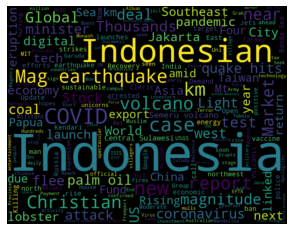

In [73]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=900, height=700, random_state=21, max_font_size=500).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [74]:
pip install WordCloud

In [77]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,How a Christian-Muslim Conflict in Eastern Ind...,0.000000,0.000000,Neutral
1,'Embarrassing': Murdoch Uni urged to reconside...,0.000000,0.000000,Neutral
2,Indonesia's unicorns lure US tech giants from ...,0.000000,0.000000,Neutral
3,5.1-magnitude quake hits 33 km WNW of Berastag...,0.000000,0.000000,Neutral
4,Moderate mag. 5.5 earthquake - 37 km west of K...,0.700000,0.000000,Neutral
...,...,...,...,...
195,Indonesia's nation-building could be good for ...,0.633333,0.516667,Positive
196,Encouraging early gold hits for Sihayo in Indo...,0.300000,0.100000,Positive
197,Indonesian minister apologizes after arrest on...,0.000000,-0.050000,Negative
198,Fitch Ratings 2021 Outlook: Indonesian Coal,0.000000,0.000000,Neutral


In [78]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) This tropical glacier is rare, revered, and could be gone by next year 

2) Light 4.6 quake hits near Kencong, Indonesia 

3) Indonesia's manpower minister tests positive for COVID-19 

4) New Indonesia palm oil levy seen hurting demand, smallholder farms 

5) Indonesia Embraces Sustainable Energy With Launch Of New SDG7 Roadmap 

6) Garuda Select Introduces the World to Indonesia's Bright Young Footballers 

7) Indonesia shares near nine-month high on rate cut hopes 

8) Mild Recovery in 2021 for Indonesian Automobile Sales; Won't Reach 2019 Level 

9) Soft Start Seen For Indonesia Stock Market 

10) PT. ALTO Network Partners with INETCO to Secure Indonesia's National Payment Gateway 

11) Indonesia: Controversial Cleric Apologizes over Gatherings after Public Outcry 

12) The Untold Story Of How Indonesian And Australian Jets Nearly Came To Blows Over East Timor 

13) Indonesian Biodiesel Tariffs Get Green Light From CIT Judge 

14) Jakarta governor test

In [79]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Rapid 2021 Recovery Unlikely for Large Indonesian Grocery Retailers 

2) Brutal Attack in Indonesia Targets Christian Farmers 

3) Indonesia behind on 2020 coal export target 

4) [INSIGHT] Poor coronavirus handling: A warning to reshape Indonesia`s scientific literacy 

5) Indonesia: Hundreds displaced due to volcanic activity 

6) Late April start for 2021 WorldSBK season as Indonesia returns to schedule 

7) Indonesian export duty on crude palm oil in Dec raised to $33/mt from $3/mt 

8) Lobster export policy that landed Indonesian minister in jail could resume 

9) Four killed in attack on Indonesian Salvation Army outpost 

10) Indonesia sees a sustainable future for Sintang and other local communities 

11) Indonesia, France discuss military cooperation 

12) Indonesian Army chief discusses Platoon Exchange with US military 

13) Indonesia Claims Covid Cold Chain Nears Completion as New Cases Pass 5000 Again 

14) Indonesian Police Seek IS-linked Sus

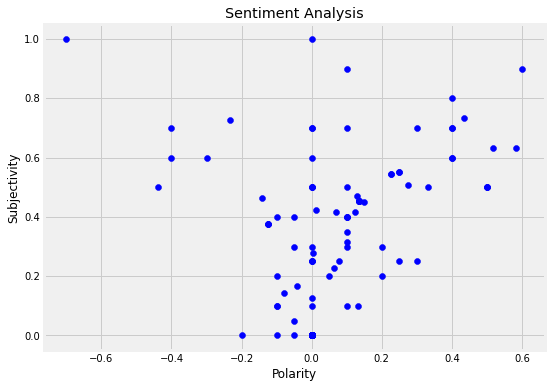

In [80]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [81]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

24.5

In [82]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

11.0

In [64]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     129
Positive     49
Negative     22
Name: Analysis, dtype: int64

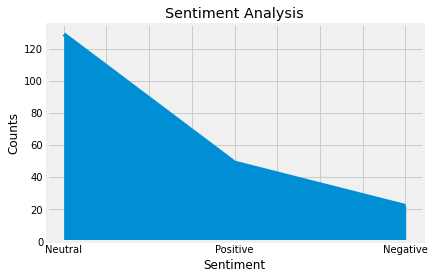

In [83]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()

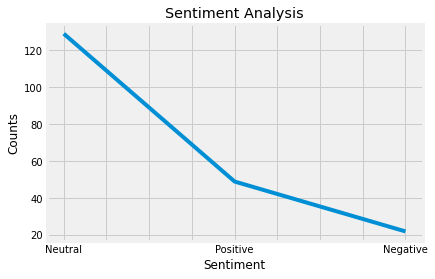

In [66]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()